# Курс "Обработка изображений" ВШЭ

## 1 модуль

### Устройство изображения. Работа с изображениями в Python

#### Чтение, запись изображений

In [1]:
# Для вывода изображений
import matplotlib.pyplot as plt

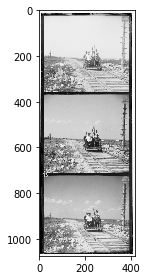

In [3]:
from skimage.io import imread, imsave, imshow
img = imread("https://stepik.org/media/attachments/lesson/58180/img.png")
#imsave("out_img.png", img)
imshow(img)

#### Изменение значения пикселя

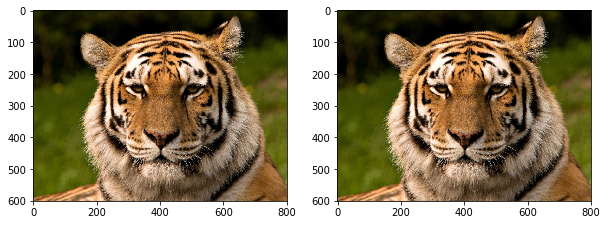

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-color.png")
h, w = img.shape[0], img.shape[1]
a, b = int(h / 2), int(w / 2)

ax[0].imshow(img)

img[a, b] = (102, 204, 102)

ax[1].imshow(img)

#### Срезы

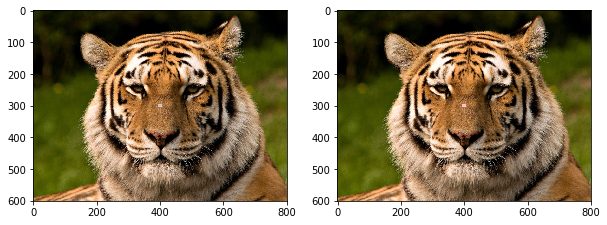

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-gray.png")
a, b = [int(img.shape[i] / 2) for i in range(2)]

ax[0].imshow(img)

img[a-3:a+4, b-7:b+8] = (255, 192, 203) 

ax[1].imshow(img)

Имеется изображение состоящая из рамки зеленого цвета. Нужно было определенить размеры рамки.

1 39 25 7


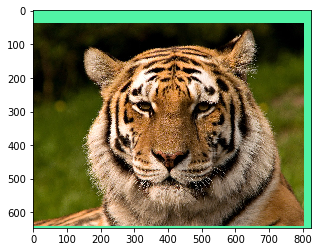

In [55]:
def eq(p1, p2):
    return p1[0] == p2[0] and p1[1] == p2[1]

from skimage.io import imread, imsave

img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-border.png")

h, w = img.shape[:-1]
a, b = int(h / 2), int(w / 2)

r1, r2, r3, r4 = 0, 0, w-1, h-1

while eq(img[a, r1], img[0, 0]):
    r1 += 1

while eq(img[a, r3], img[0, 0]):
    r3 -= 1
    
while eq(img[r2, b], img[0, 0]):
    r2 += 1
    
while eq(img[r4, b], img[0, 0]):
    r4 -= 1
    
plt.imshow(img)
print(r1, r2, w - r3 - 1, h - r4 - 1)

### А так же арифметические операции с изображениями

#### Вычисление негатива изображения

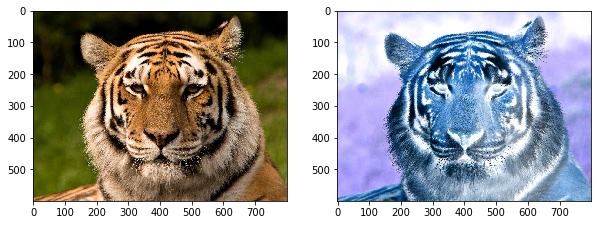

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png")

ax[0].imshow(img)

img =  255 - img

ax[1].imshow(img)

#### Каналы изображений

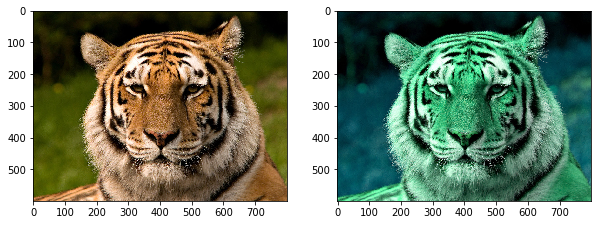

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png")

ax[0].imshow(img)

r, g, b = [img[:, :, i] for i in range(3)]

import numpy

ax[1].imshow(numpy.dstack((b, r, g)))

#### Вычисление яркости изображений

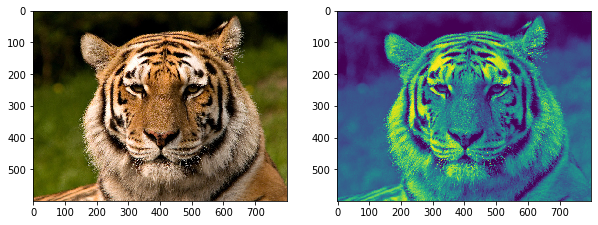

In [58]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_ubyte


fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

img = img_as_float(imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png"))

ax[0].imshow(img)

r, g, b = [img[:, :, i] for i in range(3)]
y = img_as_ubyte(r * 0.2126 + g* 0.7152 + b*0.0722)

ax[1].imshow(y)

### Была решена задача сопостовления фотографий Прокудина-Горского
##### Нужно было из фотографий каналов одного изображения составить одно цветное
##### Мы познакомились с понятием корреляции и использовали все знания полученные во время прохождения модуля

In [59]:
def carrel(x1, x2):
    carrel_max = 0
    x_eq, y_eq = 0, 0
    
    for x in range(-15, 16):
        for y in range(-15, 16):
            y1 = numpy.roll(x1, x, axis=0)
            y1 = numpy.roll(y1, y, axis=1)
            
            if (y1 * x2).sum() > carrel_max:
                carrel_max = (y1 * x2).sum()
                x_eq = x
                y_eq = y
                
    return x_eq, y_eq

def get_rgb_from_image(img):
    h, w = img.shape

    oneh = h // 3

    nontrips = [img[oneh * i:oneh * (i+1), :] for i in range(3)]

    triph, tripw = (h // 100) * 10, (w // 100) * 10
    b, g, r = [nontrips[i][triph:-triph, tripw:-tripw] for i in range(3)]
    
    return r, g, b

def calculate(r, g, b):
    xr, yr = carrel(r, g)
    xb, yb = carrel(b, g)
    
    return xr, yr, xb, yb
    
def align(img, g_coord):
    row_g, col_g = g_coord
    
    r, g, b = get_rgb_from_image(img)
    
    xr, yr, xb, yb = calculate(r, g, b)
    
    h, _ = img.shape
    oneh = h // 3
    
    row_b, col_b, row_r, col_r = row_g - xb - oneh, col_g - yb, row_g - xr + oneh, col_g - yr
    
    return (row_b, col_b), (row_r, col_r)